## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr 
from scipy.stats import linregress
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
ind_mice = mouse_study['Mouse ID'].value_counts()

total_mice = len(ind_mice)
     
print(f'This study used a total of {total_mice} mice.')    

This study used a total of 249 mice.


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep = 'first')] 


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID']=='g989']
duplicate_mouse

clean_data = mouse_study.drop(mouse_study.index[908:921])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice in the clean DataFrame.
mice = clean_data['Mouse ID'].value_counts()

total_mice = len(mice)

total_mice

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data['Drug Regimen'].unique()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_summary = clean_data.groupby(['Drug Regimen'])

mean = drug_summary['Tumor Volume (mm3)'].mean()
median = drug_summary['Tumor Volume (mm3)'].median()
var = drug_summary['Tumor Volume (mm3)'].var()
std = drug_summary['Tumor Volume (mm3)'].std()
sem = drug_summary['Tumor Volume (mm3)'].sem()

sum_stat_1 = pd.concat([mean, median, var, std, sem], axis=1)
sum_stat_1.columns = ['mean', 'median', 'variance', 'std', 'standard error']
sum_stat_1

,mean,median,variance,std,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_stat_2 = pd.DataFrame({
    'mean': drug_summary['Tumor Volume (mm3)'].mean(),
    'median': drug_summary['Tumor Volume (mm3)'].median(),
    'variance': drug_summary['Tumor Volume (mm3)'].var(),
    'std': drug_summary['Tumor Volume (mm3)'].std(),
    'standard error': drug_summary['Tumor Volume (mm3)'].sem()
})

sum_stat_2

,mean,median,variance,std,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

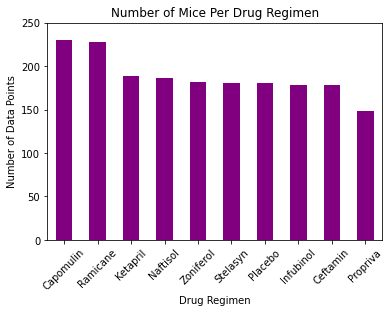

In [97]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

total_mice_grouped = clean_data.groupby(['Drug Regimen'])

count = total_mice_grouped['Mouse ID'].count()
count.sort_values(ascending=False, inplace=True)
count.plot(kind='bar', color='purple', title='Number of Mice Per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Data Points', rot=45, ylim=(0, 250))

(0.0, 250.0)

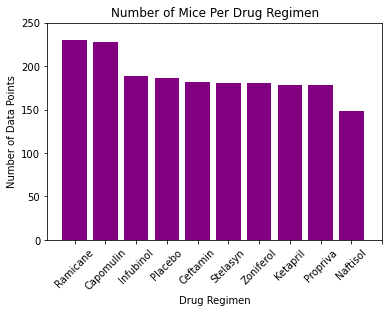

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values = range(0, 10)
x_labels = mouse_study['Drug Regimen'].unique()
y_values = count
plt.bar(x_values, y_values, color='purple')
plt.xticks(np.arange(11), x_labels, rotation='45')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Mice Per Drug Regimen')
plt.ylim(0, 250)



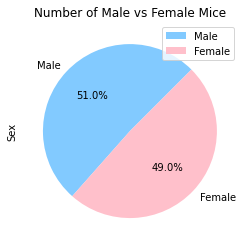

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender = clean_data['Sex'].value_counts()

gender.plot(kind='pie', title='Number of Male vs Female Mice', startangle=45, colors=['#82CAFF', 'pink'], autopct="%1.1f%%", legend='best')

Text(0, 0.5, 'Sex')

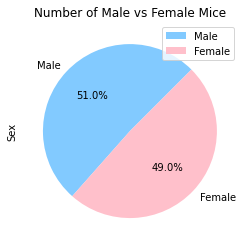

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = gender
plt.pie(sizes, labels=labels, colors=['#82CAFF', 'pink'], autopct="%1.1f%%", startangle=45,)
plt.title('Number of Male vs Female Mice')
plt.legend(loc='best')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

target_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.drop_duplicates(subset=['Mouse ID'], keep = 'last')

final_tumor_volume = last_timepoint[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
final_tumor_volume.sort_values(['Drug Regimen'], inplace=True)

final_tumor_volume.head(20)




C:\Users\hanna\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
299,Capomulin,b742,38.939633
440,Capomulin,i557,47.685963
390,Capomulin,r944,41.581521
380,Capomulin,l509,41.483008
370,Capomulin,s710,40.728578
360,Capomulin,g316,40.159220
350,Capomulin,v923,40.658124
340,Capomulin,w150,39.952347
337,Capomulin,j119,38.125164
317,Capomulin,j246,38.753265


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [111]:
#capomulin
cap_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Capomulin']
tumor_vol_cap_list = list(cap_df['Tumor Volume (mm3)'])
tumor_vol_cap = cap_df['Tumor Volume (mm3)']
cap_quan = tumor_vol_cap.quantile([0.25, 0.5, 0.75])
lquart_cap = cap_quan[0.25]
uquart_cap = cap_quan[0.75]
iqr_cap = uquart_cap - lquart_cap
ubound_cap = uquart_cap + 1.5 * iqr_cap
lbound_cap = lquart_cap - 1.5 * iqr_cap
cap_normed = tumor_vol_cap.loc[(tumor_vol_cap > lbound_cap) & (tumor_vol_cap < ubound_cap)]
outliers_cap = tumor_vol_cap.loc[(tumor_vol_cap < lbound_cap) | (tumor_vol_cap > ubound_cap)]
print(f'The data for the Capomulin Regimen has no outliers')

Series([], Name: Tumor Volume (mm3), dtype: float64)
The data for the Capomulin Regimen has no outliers


In [112]:
#ceftamin
cef_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ceftamin']
tumor_vol_cef_list = list(cef_df['Tumor Volume (mm3)'])
tumor_vol_cef = cap_df['Tumor Volume (mm3)']
cef_quan = tumor_vol_cef.quantile([0.25, 0.5, 0.75])
lquart_cef = cef_quan[0.25]
uquart_cef = cef_quan[0.75]
iqr_cef = uquart_cef - lquart_cef
ubound_cef = uquart_cef + 1.5 * iqr_cef
lbound_cef = lquart_cef - 1.5 * iqr_cef
cef_normed = tumor_vol_cef.loc[(tumor_vol_cef > lbound_cef) & (tumor_vol_cef < ubound_cef)]
outliers_cef = tumor_vol_cef.loc[(tumor_vol_cef < lbound_cef) | (tumor_vol_cef > ubound_cef)]
print(f'The data for the Ceftamin Regimen has no outliers')

The data for the Ceftamin Regimen has no outliers


In [110]:
#infubinol
inf_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Infubinol']
tumor_vol_inf_list = list(inf_df['Tumor Volume (mm3)'])
tumor_vol_inf = inf_df['Tumor Volume (mm3)']
inf_quan = tumor_vol_inf.quantile([0.25, 0.5, 0.75])
lquart_inf = inf_quan[0.25]
uquart_inf = inf_quan[0.75]
iqr_inf = uquart_inf - lquart_inf
ubound_inf = uquart_inf + 1.5 * iqr_inf
lbound_inf = lquart_inf - 1.5 * iqr_inf
inf_normed = tumor_vol_inf.loc[(tumor_vol_inf > lbound_inf) & (tumor_vol_inf < ubound_inf)]
outliers_inf = tumor_vol_inf.loc[(tumor_vol_inf < lbound_inf) | (tumor_vol_inf > ubound_inf)]
outliers_inf = list(outliers_inf)
print(f'The data for the Infubinol Regimen has one outlier with a tumor volume of {outliers_inf}')

The data for the Infubinol Regimen has one outlier with a tumor volume of [36.321345799999996]


In [114]:
#ramicane
ram_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == 'Ramicane']
tumor_vol_ram_list = list(ram_df['Tumor Volume (mm3)'])
tumor_vol_ram = ram_df['Tumor Volume (mm3)']
ram_quan = tumor_vol_ram.quantile([0.25, 0.5, 0.75])
lquart_ram = ram_quan[0.25]
uquart_ram = ram_quan[0.75]
iqr_ram = uquart_ram - lquart_ram
ubound_ram = uquart_ram + 1.5 * iqr_ram
lbound_ram = lquart_ram - 1.5 * iqr_ram
ram_normed = tumor_vol_ram.loc[(tumor_vol_ram > lbound_ram) & (tumor_vol_ram < ubound_ram)]
outliers_ram = tumor_vol_ram.loc[(tumor_vol_ram < lbound_ram) | (tumor_vol_ram > ubound_ram)]
print(f'The data for the Ramicane Regimen has no outliers')

The data for the Ramicane Regimen has no outliers


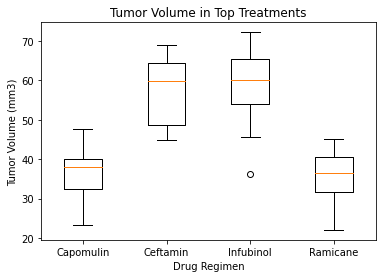

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumor_vol_cap_list, tumor_vol_cef_list, tumor_vol_inf_list, tumor_vol_ram_list]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumor Volume in Top Treatments')
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

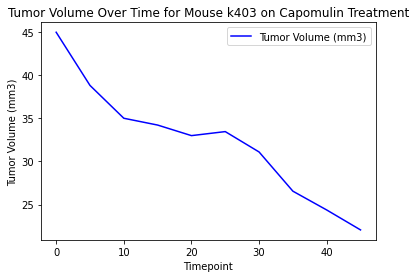

In [116]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
last_timepoint.sort_values('Tumor Volume (mm3)')
smallest_tumor_mouse_id = 'k403'
smallest_tumor_mouse_df = clean_data.loc[clean_data["Mouse ID"] == smallest_tumor_mouse_id, :]
k403_tumor_vol = smallest_tumor_mouse_df[['Timepoint', 'Tumor Volume (mm3)']]
k403_tumor_vol = k403_tumor_vol.set_index('Timepoint')
k403_tumor_vol.plot(kind='line', color='blue', xlabel='Timepoint', ylabel='Tumor Volume (mm3)', title='Tumor Volume Over Time for Mouse k403 on Capomulin Treatment')

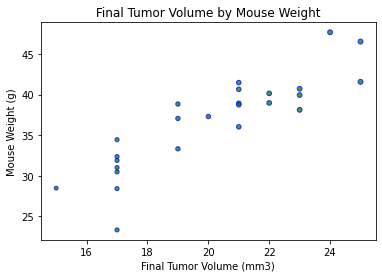

In [117]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = cap_df['Weight (g)']
y_values = cap_df['Tumor Volume (mm3)']

plt.scatter(x_values, y_values, marker='o', facecolors='green', edgecolors='blue', s=x_values, alpha=.75)
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Mouse Weight')

plt.show()


## Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime
correlation_coefficient_cap = st.pearsonr(x_values, y_values)
print(f'The Correlation Coefficient for the Final Tumor Volume in the Capomulin Regimen is {round(correlation_coefficient_cap[0], 2)}')


The Correlation Coefficient for the Final Tumor Volume in the Capomulin Regimen is 0.88


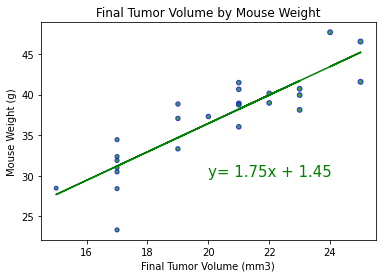

In [119]:
x_values = cap_df['Weight (g)']
y_values = cap_df['Tumor Volume (mm3)']

plt.scatter(x_values, y_values, marker='o', facecolors='green', edgecolors='blue', s=x_values, alpha=.75)
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Mouse Weight')

lin_reg_cap = linregress(x_values, y_values)
slope = lin_reg_cap.slope
intercept = lin_reg_cap.intercept

predicted_values = x_values * slope + intercept
plt.plot(x_values, predicted_values, color='green')

line_eq = f'y= {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, xy=(20, 30), color="green", fontsize=15)

plt.show()